# Midterm Fall 2022 Quarter Catherine Carlo INFO 4120 Section 2
## Phase One - Report

### Executive Summary
Three research questions were asked & data was analyzed to answer them. The questions surrounded the correlation between Sport toughness, Player Earnings & Sport Popularity by country. In the end, there was foudn to be no corrrelation between the topics.

### Research Questions
1. Do Athletes of tougher sports get paid more?\
Need to know: 
- Which sports are in Top 100 paid athletes (bar graph)
- Toughness of those sports (merge dfs)
- If there is correlation between $$ & toughness (heatmap)
2. Are the most popular sports by country tough?\
Need to know:
- Which sports are popular (bar graph)
- Toughness of those sports (merge dfs)
- If correlation between popularity & toughness (heatmap)
3. Do popular sports by country impact Top 100 paid athletes?
- Find correlation & make heatmap


In [19]:
#importing packages
import pandas as pd
import numpy as np
from numpy import nan as NA
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sb

#Set the path
import os
os.chdir('C:\\Users\\15857\\info 4120\\week 6') #making sure working out of correct file
os.getcwd()

'C:\\Users\\15857\\info 4120\\week 6'

#### Data Source 1
Toughness of Sport Rankings -- CSV file from ESPN
#### Column Descriptions:
Sport - Identifying which sport per row \
Endurance - Measured score out of 10 \
Strength - Measured score out of 10 \
Power - Measured score out of 10 \
Speed - Measured score out of 10 \
Agility - Measured score out of 10 \
Flexibility - Measured score out of 10 \
Nerve - Measured score out of 10 \
Durability - Measured score out of 10 \
Hand-Eye Coordination - Measured score out of 10 \
Analytic Aptitude - Measured score out of 10 \
Total - Combined measured score of all other quantitative variables

In [4]:
tough= DataFrame(pd.read_csv('toughestsport.csv'))#import csv file
tough.index=list(tough.RANK) #putting rank colummn as index
tough=tough.drop('RANK', axis=1) #dropping rank column because it is now a duplicate of index
#changing column names to be more easily read/understood
tough=tough.rename(columns={'SPORT':'Sport','END':'Endurance','STR':"Strength",'PWR':'Power','SPD':'Speed','AGI':'Agility','FLX':'Flexibility'})
tough=tough.rename(columns={'NER':'Nerve','DUR':"Durability",'HAN':'Hand-Eye Coordination','ANA':'Analytic Aptitude'})
tough.head()#print first few rows of dataframe

,Sport,Endurance,Strength,Power,Speed,Agility,Flexibility,Nerve,Durability,Hand-Eye Coordination,Analytic Aptitude,TOTAL
1,Boxing,8.63,8.13,8.63,6.38,6.25,4.38,8.88,8.50,7.00,5.63,72.375
2,Ice Hockey,7.25,7.13,7.88,7.75,7.63,4.88,6.00,8.25,7.50,7.50,71.750
3,Football,5.38,8.63,8.13,7.13,6.38,4.38,7.25,8.50,5.50,7.13,68.375
4,Basketball,7.38,6.25,6.50,7.25,8.13,5.63,4.13,7.75,7.50,7.38,67.875
5,Wrestling,6.63,8.38,7.13,5.13,6.38,7.50,5.00,6.75,4.25,6.38,63.500


In [11]:
tough['TOTAL']=tough['TOTAL'].astype(int) #Descriptive stats for toughest sport totals
print(f"Max toughness score was {round(tough.TOTAL.max(),0)}.")
print(f"Min toughness score was {round(tough.TOTAL.min(),0)}.")
print(f"Median toughness score was {round(tough.TOTAL.median(),0)}.")
print(f"Average toughness score was {round(tough.TOTAL.mean(),0)}.")
print(f"Standard deviation in toughness score was {round(tough.TOTAL.std(),0)}.")
print(f"Variance in toughness score was {round(tough.TOTAL.var(),0)}.")

Max toughness score was 72.
Min toughness score was 14.
Median toughness score was 48.0.
Average toughness score was 49.0.
Standard deviation in toughness score was 12.0.
Variance in toughness score was 148.0.


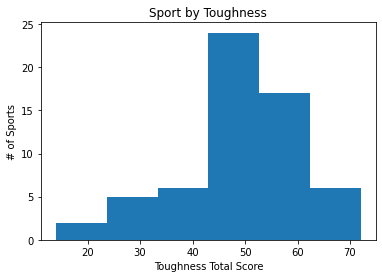

<Figure size 432x288 with 0 Axes>

In [12]:
plt.hist(tough.TOTAL,6)
plt.title('Sport by Toughness')
plt.xlabel('Toughness Total Score')
plt.ylabel('# of Sports')
plt.show()
plt.savefig('Sport_By_Toughness.png')

#### Data Source 2
Top 100 Paid Athletes in World -- CSV file from Forbes
#### Column Descriptions:
Name - Identifying athlete per row \
Earnings - Money earned per year in $ Millions \
Year - What year athlete had these earnings \
Sport - Which sport athlete plays

In [5]:
highestpaid= DataFrame(pd.read_csv('forbesathletesv2.csv')) #import csv file
top100=highestpaid.loc[:100] #print first few rows of dataframe
top100

,Name,Earnings,Year,Sport
0,Conor McGregor,180.0,2021,Mixed Martial Arts
1,Lionel Messi,130.0,2021,Soccer
2,Cristiano Ronaldo,120.0,2021,Soccer
3,Dak Prescott,107.5,2021,Football
4,LeBron James,96.5,2021,Basketball
...,...,...,...,...
96,Matt Ryan,29.5,2020,Football
97,Daniel Ricciardo,29.0,2020,Racing
98,Mesut Ozil,28.7,2020,Soccer
99,Kyle Lowry,28.5,2020,Basketball


In [7]:
top100['Earnings']=top100['Earnings'].astype(int) #Descriptive stats for Top 100 highest paid athletes of 2021
print(f"Max earnings of the top 100 athletes in 2021 was ${round(top100.Earnings.max(),0)} million.")
print(f"Min earnings on of the top 100 atheletes in 2021 was ${round(top100.Earnings.min(),0)} million.")
print(f"Median earnings for top 100 athletes in 2021 was ${round(top100.Earnings.median(),0)} million.")
print(f"Average earnings for top 100 athletes in 2021 was ${round(top100.Earnings.mean(),0)} million.")
print(f"Standard deviation of earnings for top 100 athletes in 2021 was ${round(top100.Earnings.std(),0)} million.")
print(f"Variance of earnings for top 100 athletes in 2021 was ${round(top100.Earnings.var(),0)} million.")

Max earnings of the top 100 athletes in 2021 was $180 million.
Min earnings on of the top 100 atheletes in 2021 was $28 million.
Median earnings for top 100 athletes in 2021 was $41.0 million.
Average earnings for top 100 athletes in 2021 was $51.0 million.
Standard deviation of earnings for top 100 athletes in 2021 was $26.0 million.
Variance of earnings for top 100 athletes in 2021 was $667.0 million.


C:\Users\15857\AppData\Local\Temp\ipykernel_3616\1763646611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top100['Earnings']=top100['Earnings'].astype(int) #Descriptive stats for Top 100 highest paid athletes of 2021


In [8]:
earnings = top100.Earnings #making list of values from earnings column of top100
bins = [25, 35, 45, 55, 90, 180] #creating bins for x axis
cats = pd.cut(earnings, bins) #getting counts
counts = pd.value_counts(cats) 
top100df=DataFrame(counts) #making dataframe
top100df #display dataframe

,Earnings
"(35, 45]",36
"(25, 35]",26
"(55, 90]",16
"(45, 55]",13
"(90, 180]",10


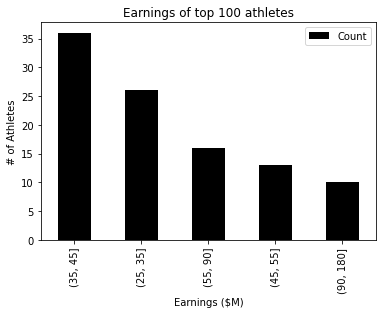

In [9]:
top100df.columns=['Count'] #making bar graph with bins created earlier
top100df.plot(kind='bar',color='black',title='Earnings of top 100 athletes',xlabel='Earnings ($M)', ylabel="# of Athletes")
plt.savefig('Earnings_top100_bins')

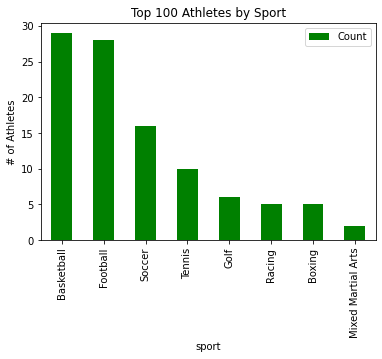

In [10]:
sportCounts=DataFrame(top100.Sport.value_counts()) #making dataframe for # of athletes in each sport for top 100
sportCounts.columns =['Count']
#making bar graph showing athlete # by sport
sportCounts.plot(kind='bar', color='green', title='Top 100 Athletes by Sport', xlabel='sport', ylabel='# of Athletes')
plt.savefig('Top_100_Earn_By_Sport.png')

##### Learnings:
- Lots of athletes in top 100 for Basketball & Football
- Athletes for Tennis + Golf + Racing + Boxing + MMA look like they could equal Basketball

#### Data Source 3
Each Country's Most Popular Sport
#### Column Descriptions:
index - countries of the world \
babbel2021 - report from babbel in 2021 \
bleacherRep2008 - report from Bleacher Report in 2008 \
mostPopularSports - report from Most Popular Sports

In [6]:
country=DataFrame(pd.read_csv('sports_by_country.csv'))#import csv file
country.index=list(country.country) #putting country colummn as index
country=country.drop('country', axis=1) #dropping  column because it is now a duplicate of index
country.fillna('missing', inplace=True)

dictbabbel={'babbel2021':
      {'Football (soccer)':"Soccer", 'American Football (NFL)':"Football"}}
dictBR={'bleacherRep2008':
        {'Football (soccer)':"Soccer", 'American Football (NFL)':"Football"}}
dictMPS={'mostPopularSports':
        {'Football (soccer)':"Soccer", 'American Football (NFL)':"Football"}}
country.replace(dictbabbel,inplace=True)
country.replace(dictBR,inplace=True)
country.replace(dictMPS,inplace=True)


country.head() #print first few rows of dataframe

,babbel2021,bleacherRep2008,mostPopularSports
Afghanistan,Cricket,Soccer,missing
Albania,Soccer,Soccer,Soccer
Algeria,Soccer,Soccer,Soccer
American Samoa,Soccer,Soccer,missing
Andorra,Soccer,Soccer,missing


In [13]:
country.babbel2021.value_counts() #count of babbel2021 column variables

Soccer                 152
Cricket                 12
Baseball                 9
Basketball               6
Rugby                    6
missing                  4
Ice Hockey               3
Australian Football      2
Boat Racing              1
Archery                  1
Windsurfing              1
Gaelic Football          1
Mongolian Wrestling      1
Football                 1
Name: babbel2021, dtype: int64

<AxesSubplot:title={'center':'Popular Sports by Country'}, xlabel='Sport', ylabel='#of Countries'>

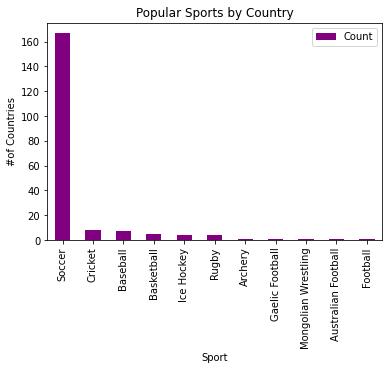

In [27]:
country.bleacherRep2008.value_counts() #count of Bleacher Report 2008 column variables
#going forward, only going to use bleacherRep2008 column of country dataframe since there are no missing variables
BR2008=DataFrame(country.bleacherRep2008.value_counts()) #making dataframe for sport popularity by country
BR2008.columns =['Count']  #making bar graph showing athlete # by sport
BR2008.plot(kind='bar', color='purple', title='Popular Sports by Country', xlabel='Sport', ylabel='#of Countries') 
#plt.savefig('Popular_Sports_By_Country.png')

##### Learnings
- Soccer is most popular by FAR

In [15]:
country.mostPopularSports.value_counts() #count of Most Popular Sports column variables

missing                84
Soccer                 57
Basketball             14
Tennis                  6
Ice Hockey              6
Wrestling               6
Water Sports            5
Cricket                 5
Baseball                3
Boxing                  3
Cycling                 2
Martial Arts            2
Australian Football     1
Skating                 1
Cue Sports              1
Motor Sports            1
Rugby                   1
Football                1
Skateboarding           1
Name: mostPopularSports, dtype: int64

#### Do Athletes of tougher sports get paid more?
- Merge Tough & Top100 Dataframes
- Find correlations
- Make heatmaps

In [16]:
toptough=pd.merge(tough,top100, on='Sport') #merging top100 & tough together on sport
toptoughclean=toptough.drop('Endurance', axis=1) #getting rid of unnecessary colummns
toptoughclean=toptoughclean.drop('Strength', axis=1)
toptoughclean=toptoughclean.drop('Power', axis=1)
toptoughclean=toptoughclean.drop('Speed', axis=1)
toptoughclean=toptoughclean.drop('Agility', axis=1)
toptoughclean=toptoughclean.drop('Flexibility', axis=1)
toptoughclean=toptoughclean.drop('Nerve', axis=1)
toptoughclean=toptoughclean.drop('Durability', axis=1)
toptoughclean=toptoughclean.drop('Hand-Eye Coordination', axis=1)
toptoughclean=toptoughclean.drop('Analytic Aptitude', axis=1)
toptoughclean=toptoughclean.drop('Year', axis=1)
toptoughclean=toptoughclean.rename(columns={'TOTAL':'Toughness','Name':'Player Name'})
#finding correlation between toughness total & player earnings
toptoughclean.corr()

,Toughness,Earnings
Toughness,1.000000,-0.094782
Earnings,-0.094782,1.000000


In [17]:
toptough.corr() #correlation between all qualitative variables in toptough dataframe

,Endurance,Strength,Power,Speed,Agility,Flexibility,Nerve,Durability,Hand-Eye Coordination,Analytic Aptitude,TOTAL,Earnings,Year
Endurance,1.000000,-0.256159,-0.347055,0.616954,0.836156,0.631733,-0.184561,0.217416,0.665338,0.169200,0.495668,0.103587,-0.153048
Strength,-0.256159,1.000000,0.887065,0.374990,-0.074092,-0.328035,0.930916,0.828049,-0.517156,-0.122092,0.680744,-0.204512,0.098894
Power,-0.347055,0.887065,1.000000,0.095691,-0.298369,-0.327495,0.831820,0.533468,-0.342645,-0.492505,0.468212,-0.220600,0.051579
Speed,0.616954,0.374990,0.095691,1.000000,0.883579,0.417814,0.285631,0.744607,0.144664,0.550696,0.891083,0.007298,0.020765
Agility,0.836156,-0.074092,-0.298369,0.883579,1.000000,0.707328,-0.156844,0.420100,0.511163,0.601776,0.659979,0.085400,-0.049980
Flexibility,0.631733,-0.328035,-0.327495,0.417814,0.707328,1.000000,-0.538122,0.019273,0.890293,0.366911,0.277933,0.027791,-0.109284
Nerve,-0.184561,0.930916,0.831820,0.285631,-0.156844,-0.538122,1.000000,0.758558,-0.611601,-0.296251,0.605383,-0.165160,0.071866
Durability,0.217416,0.828049,0.533468,0.744607,0.420100,0.019273,0.758558,1.000000,-0.273549,0.253000,0.915631,-0.132889,0.058474
Hand-Eye Coordination,0.665338,-0.517156,-0.342645,0.144664,0.511163,0.890293,-0.611601,-0.273549,1.000000,-0.020005,0.051230,0.055268,-0.175680
Analytic Aptitude,0.169200,-0.122092,-0.492505,0.550696,0.601776,0.366911,-0.296251,0.253000,-0.020005,1.000000,0.219432,0.089423,0.104020


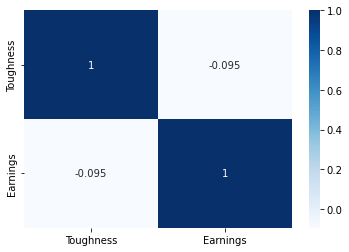

In [20]:
##Heat map between toughness & earnings
corr = toptoughclean.corr()
sb.heatmap(corr, cmap="Blues", annot=True)
plt.savefig('Correlation_Top100_Toughness.png')

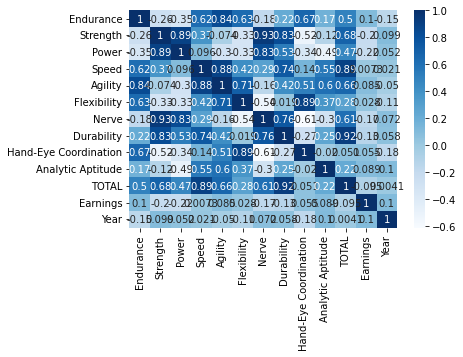

In [21]:
##Heat map between all variables
correl = toptough.corr()
sb.heatmap(correl, cmap="Blues", annot=True)
plt.savefig('Correlation_Top100_ToughVars.png')

##### Research Question 1 Conclusion:
No correlation between sport toughness & top 100 athlete earnings

#### Are the most popular sports by country tough?
- Merge Tough & BR2008 Dataframes
- Find correlations
- Make heatmaps

In [29]:
BR2008.reset_index(inplace=True) #making index Sport to be able to merge with tough df
BR2008=BR2008.rename(columns = {'index':'Sport'})
BR2008

,Sport,Count
0,Soccer,167
1,Cricket,8
2,Baseball,7
3,Basketball,5
4,Ice Hockey,4
5,Rugby,4
6,Archery,1
7,Gaelic Football,1
8,Mongolian Wrestling,1
9,Australian Football,1


In [30]:
PopTough=pd.merge(tough,BR2008, on='Sport') #merging BR2008 & tough together on sport
PopToughClean=PopTough.drop('Endurance', axis=1) #getting rid of unnecessary colummns
PopToughClean=PopToughClean.drop('Strength', axis=1)
PopToughClean=PopToughClean.drop('Power', axis=1)
PopToughClean=PopToughClean.drop('Speed', axis=1)
PopToughClean=PopToughClean.drop('Agility', axis=1)
PopToughClean=PopToughClean.drop('Flexibility', axis=1)
PopToughClean=PopToughClean.drop('Nerve', axis=1)
PopToughClean=PopToughClean.drop('Durability', axis=1)
PopToughClean=PopToughClean.drop('Hand-Eye Coordination', axis=1)
PopToughClean=PopToughClean.drop('Analytic Aptitude', axis=1)

PopToughClean.corr() #correlation between total toughness & popularity by country

,TOTAL,Count
TOTAL,1.000000,0.062476
Count,0.062476,1.000000


In [31]:
PopTough.corr() #correlation between all numeric variables & popularity by country

,Endurance,Strength,Power,Speed,Agility,Flexibility,Nerve,Durability,Hand-Eye Coordination,Analytic Aptitude,TOTAL,Count
Endurance,1.000000,0.165915,0.537414,0.889708,0.957546,0.890545,0.264139,0.743209,0.133192,0.861778,0.827519,0.424487
Strength,0.165915,1.000000,0.895999,0.517046,0.292692,0.326211,0.945108,0.781647,-0.329774,0.416050,0.654683,-0.554886
Power,0.537414,0.895999,1.000000,0.823568,0.656683,0.657444,0.867545,0.941846,-0.065656,0.754892,0.908702,-0.272395
Speed,0.889708,0.517046,0.823568,1.000000,0.964962,0.910215,0.548717,0.914425,0.102792,0.980017,0.982007,0.246321
Agility,0.957546,0.292692,0.656683,0.964962,1.000000,0.953196,0.328520,0.807666,0.209010,0.967505,0.910861,0.394123
Flexibility,0.890545,0.326211,0.657444,0.910215,0.953196,1.000000,0.273420,0.790225,0.339453,0.921977,0.886012,0.188721
Nerve,0.264139,0.945108,0.867545,0.548717,0.328520,0.273420,1.000000,0.802261,-0.511861,0.415710,0.662188,-0.385697
Durability,0.743209,0.781647,0.941846,0.914425,0.807666,0.790225,0.802261,1.000000,-0.150489,0.830597,0.966380,-0.097342
Hand-Eye Coordination,0.133192,-0.329774,-0.065656,0.102792,0.209010,0.339453,-0.511861,-0.150489,1.000000,0.249717,0.061416,0.073113
Analytic Aptitude,0.861778,0.416050,0.754892,0.980017,0.967505,0.921977,0.415710,0.830597,0.249717,1.000000,0.941422,0.330142


<AxesSubplot:>

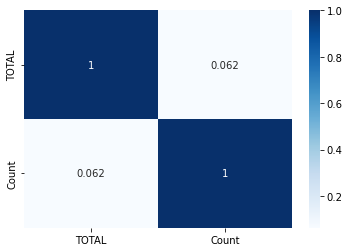

In [32]:
##Heat map between all variables
correl = PopToughClean.corr() #count means Count of countries where sport is most popular
sb.heatmap(correl, cmap="Blues", annot=True)

<AxesSubplot:>

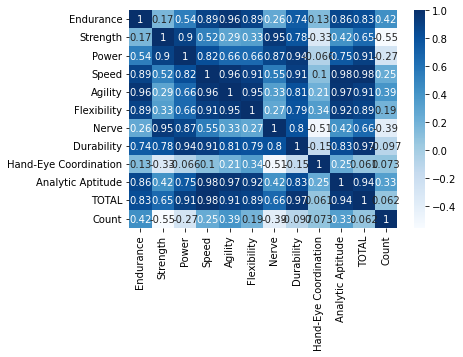

In [33]:
##Heat map between all variables; not deleting excess columns because it's interesting to see relation between them
correl = PopTough.corr()##count means # of countries where sport is most popular
sb.heatmap(correl, cmap="Blues", annot=True)

##### Research Question 2 Conclusion:
No correlation between sport toughness & sport popularity by country

#### Do popular sports by country impact Top 100 paid athletes?
- Merge Top100 & BR2008 Dataframes
- Find correlations
- Make heatmaps

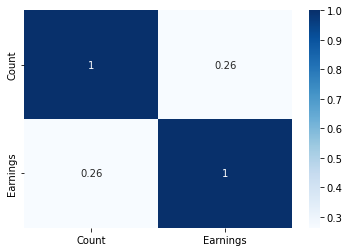

In [34]:
#merging top100 athletes & sports by country BR2008
Top100bySportCountry=pd.merge(BR2008,top100, on='Sport') #merging top100 athletes & sports by country BR2008
Top100bySportCountry=Top100bySportCountry.drop('Year', axis=1) #dropping 'year' column that came from top100
cor=Top100bySportCountry.corr() #correlation between Sports by Country & Top100 Earnings
sb.heatmap(cor, cmap="Blues", annot=True) #correlation heatmap
plt.savefig('EarningsByPopularSport.png') #saving as png

##### Research Question 3 Conclusion:
No correlation between sport popularity by country & top 100 athlete earnings

In [38]:
#merging all dataframes together
FinalBoss=pd.merge(Top100bySportCountry,toptoughclean, on='Sport') #merging top100 athletes & sports by country BR2008
FinalBoss=FinalBoss.drop('Earnings_x', axis=1) #droping duplicate column
FinalBoss=FinalBoss.drop('Name', axis=1) #droping duplicate column
FinalBoss=FinalBoss.rename(columns={'Count':'# of Countries','Earnings_y':'Earnings ($M)'})
FinalBoss.to_csv('all3Merge_FinalVersionFile.csv') ##final merged file***
FinalBoss

,Sport,# of Countries,Toughness,Player Name,Earnings ($M)
0,Soccer,167,61,Lionel Messi,130
1,Soccer,167,61,Cristiano Ronaldo,120
2,Soccer,167,61,Neymar,95
3,Soccer,167,61,Kylian Mbappe,40
4,Soccer,167,61,Mohamed Salah,37
...,...,...,...,...,...
1876,Football,1,68,Julio Jones,40
1877,Football,1,68,Grady Jarrett,33
1878,Football,1,68,Michael Thomas,32
1879,Football,1,68,Aaron Rodgers,30


In [36]:
FinalBoss.corr() #correlation of popularity by country, sport toughness, & athlete earnings

,# of Countries,Toughness,Earnings ($M)
# of Countries,1.000000,-0.985082,0.241181
Toughness,-0.985082,1.000000,-0.247791
Earnings ($M),0.241181,-0.247791,1.000000


<AxesSubplot:>

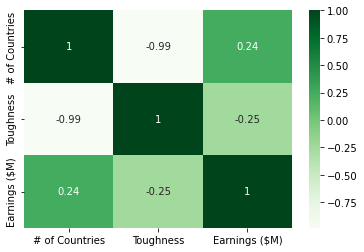

In [37]:
FinalBoss.corr() #heatmap of FinalBoss correlation
sb.heatmap(FinalBoss.corr(), cmap="Greens", annot=True)

### Conclusion
From the data sources, it was found that there is weak correlation between sport popularity, toughness, and top player earnings. 